In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'hemingway':
            label = 1
        else:
            label = 0

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [3]:
def load_just_hemingway_and_steinbeck(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        if subfolder == 'fitzgerald':
            continue
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'hemingway':
            label = 1
        else:
            label = 0

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [4]:
text_data, labels = load_data(r'C:\Users\KSpicer\Documents\GitHub\fitzgerald_hemingway\data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

X = df['text_data']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_collected_stories.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: steinbeck_cannery_row.txt
Processing file: steinbeck_east_of_eden.txt
P

In [5]:
# Train a Linear SVM model
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)     

In [6]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
# Evaluate the model on the testing set
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=['hemignway', 'steinbeck']))

accuracy 0.5
              precision    recall  f1-score   support

   hemignway       0.50      1.00      0.67         4
   steinbeck       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


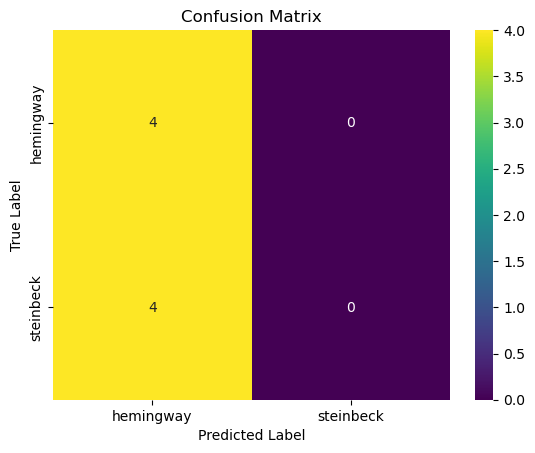

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a list of class labels
classes = ['hemingway', 'steinbeck']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [9]:

'''
# Define a new text sample to classify—Hemingway's "The Snows of Kilimanjaro"
with open(r'test_data\hemingway_snows.txt') as f:
    new_text =  f.read()

# Transform the new text sample into a bag-of-words representation
new_counts = CountVectorizer.transform([new_text])

# Use the trained model to predict the label of the new text sample
new_pred = sgd.predict(new_text)

# Print the predicted label
if new_pred == 1:
    print("The model predicts that this text is by Hemingway ...")
else:
    print("The model predicts that this text is by Fitzgerald ...")
'''

'\n# Define a new text sample to classify—Hemingway\'s "The Snows of Kilimanjaro"\nwith open(r\'test_data\\hemingway_snows.txt\') as f:\n    new_text =  f.read()\n\n# Transform the new text sample into a bag-of-words representation\nnew_counts = CountVectorizer.transform([new_text])\n\n# Use the trained model to predict the label of the new text sample\nnew_pred = sgd.predict(new_text)\n\n# Print the predicted label\nif new_pred == 1:\n    print("The model predicts that this text is by Hemingway ...")\nelse:\n    print("The model predicts that this text is by Fitzgerald ...")\n'

In [11]:
# Define a new text sample to classify Steinbeck's "In Dubious Battle"
with open(r'test_data/steinbeck_in_dubious_battle.txt') as f:
    new_text =  f.read()

# Transform the new text sample into a bag-of-words representation
new_counts = CountVectorizer.transform([new_text])

# Use the trained model to predict the label of the new text sample
new_pred = sgd.predict(new_text)

# Print the predicted label
if new_pred == 1:
    print("The model predicts that this text is by Hemingway ...")
else:
    print("The model predicts that this text is by Steinbeck ...")

FileNotFoundError: [Errno 2] No such file or directory: 'test_data/steinbeck_in_dubious_battle.txt'